In [1]:
import numpy as np
# import matplotlib.pyplot as plt

In [3]:
from utils import *

In [4]:
test_img_path = './data/IPPN_samples/ara1_rgb.png'
test_mask_path = './data/IPPN_samples/ara1_mask.png'

In [7]:
test_img = read(test_img_path)
test_mask = read(test_mask_path)

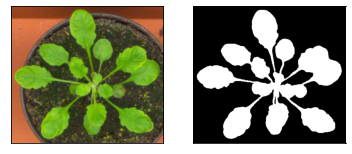

In [9]:
show([test_img, test_mask])

In [10]:
test_img.shape

(356, 396, 3)

In [11]:
test_mask.shape

(356, 396, 3)

In [31]:
def transform_single_object(img, mask,
                            output_size_mode='fixed', output_size=[1080, 1920], output_scale=2,
                            rotate=30, flip=0.5,
                            move=True, cross_boundaries=True,
                            background='none',
                            salt=0.1, pepper=0.1, gauss_noise=0.1, smooth_borders=True):
    """Applies transformations to image and mask. Stores intermediate values.
    
    Args:
        img (numpy.array): initial RGB image.
        mask (numpy.array): binary mask for initial image. Must match the size of img at first 2 dimensions.
                            Can be RGB or grayscale.
        output_size_mode (str): the rule to define output size. 
            'fixed' to set size manually, requires output_size.
            'multiplier' to set relation between input and output size, requires output_scale.
        output_size (list): defines [height, width] of ouptut image if output_size_mode is 'fixed'.
        output_scale: sets the scale of output size based on input size if output_size_mode is 'multiplier'.
            (float): Multiplies both axes. Should be >= 1.
            (list): Multipliers for separate axis. Both should be >= 1.
        rotate (int): sets maximum degrees of random rotation.
        flip (float): the probability of horizontal flip.
        move (bool): if True, the object will be randomly moved.
        cross_boundaries (bool): if move is True, allows the object to cross image boundaries. 
                                 Guaranties that at least half of the object will remain on image.
                                 if False, move requires output size to be more than input size.
        background (str): mode of adding background.
            'none' for white background.
            'img' to prvide custom background image.
        background_image (numpy.array): if background is 'img', provide an image for the background.
        salt (float): the probability to make each of the img pixels white.
        pepper (float): the probability to make each of the img pixels black.
        gauss_noise (float): the degree of applied additive Gauss noise.
        smooth_borders (bool): if True, gauss_noise will affect background.
        
    Returns:
        transformed_img (numpy.array)
    """
    if img.shape[:2] != mask.shape[:2]:
        raise UserWarning('Mask size must match image size')
    
    if (img.shape[2] != 3) or (mask.shape[2] != 3):
        raise NotImplementedError('Only RGB image supported')
    
    if output_size_mode == 'fixed':        
        scene_shape = output_size
    elif output_size_mode == 'multiplier':
        scene_shape = [int(img.shape[0] * output_scale), img.shape[1] * output_scale, 3]
    else:
        raise UserWarning('Wrong output_size_mode value')
    
    print(scene_shape)
    

In [35]:
transform_single_object(test_img, test_mask,
                        output_size_mode='multiplier', output_size=[1080, 1920], output_scale=2,
                        rotate=30, flip=0.5,
                        move=True, cross_boundaries=True,
                        background='none',
                        salt=0.1, pepper=0.1, gauss_noise=0.1, smooth_borders=True)

[712, 792, 3]
